Importing the requried libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") 
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.simplefilter(action='ignore')

In [2]:
#reading the Train_dataset.xlsx file
df= pd.read_excel('Train_dataset.xlsx')


In [3]:
df.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [4]:
df.columns

Index(['people_ID', 'Region', 'Gender', 'Designation', 'Name', 'Married',
       'Children', 'Occupation', 'Mode_transport', 'cases/1M', 'Deaths/1M',
       'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Diuresis', 'Platelets', 'HBB', 'd-dimer',
       'Heart rate', 'HDL cholesterol', 'Charlson Index', 'Blood Glucose',
       'Insurance', 'salary', 'FT/month', 'Infect_Prob'],
      dtype='object')

If you see the information about the dataframe we found that there are many missing values. So I am going to do the required preprocessing before actually building the model.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 28 columns):
people_ID                 10714 non-null int64
Region                    10714 non-null object
Gender                    10714 non-null object
Designation               10714 non-null object
Name                      10694 non-null object
Married                   10714 non-null object
Children                  10403 non-null float64
Occupation                9967 non-null object
Mode_transport            10711 non-null object
cases/1M                  10714 non-null int64
Deaths/1M                 10714 non-null int64
comorbidity               10488 non-null object
Age                       10714 non-null int64
Coma score                10714 non-null int64
Pulmonary score           10714 non-null object
cardiological pressure    10617 non-null object
Diuresis                  9998 non-null float64
Platelets                 9790 non-null float64
HBB                       10698 

In [6]:
df.isnull().sum()

people_ID                    0
Region                       0
Gender                       0
Designation                  0
Name                        20
Married                      0
Children                   311
Occupation                 747
Mode_transport               3
cases/1M                     0
Deaths/1M                    0
comorbidity                226
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
Insurance                 1090
salary                       0
FT/month                   723
Infect_Prob                  0
dtype: int64

In [7]:
#storing the people_id attribute for its further reference
people_id = df['people_ID']

As we observe the dataset there are some unnecessary features for example Designation, Children, Name, etc for predicting the probability of the infected people. So we are going to drop those features from the dataframe 

In [8]:
df= df.drop('people_ID',axis = 1)

In [9]:
df= df.drop(['Designation','Children','Name','Married','Insurance','salary'],axis = 1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 21 columns):
Region                    10714 non-null object
Gender                    10714 non-null object
Occupation                9967 non-null object
Mode_transport            10711 non-null object
cases/1M                  10714 non-null int64
Deaths/1M                 10714 non-null int64
comorbidity               10488 non-null object
Age                       10714 non-null int64
Coma score                10714 non-null int64
Pulmonary score           10714 non-null object
cardiological pressure    10617 non-null object
Diuresis                  9998 non-null float64
Platelets                 9790 non-null float64
HBB                       10698 non-null float64
d-dimer                   9600 non-null float64
Heart rate                9600 non-null float64
HDL cholesterol           10679 non-null float64
Charlson Index            10714 non-null int64
Blood Glucose             10714

In [11]:
df.isna().sum()

Region                       0
Gender                       0
Occupation                 747
Mode_transport               3
cases/1M                     0
Deaths/1M                    0
comorbidity                226
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
FT/month                   723
Infect_Prob                  0
dtype: int64

Now, its time for filling the missing values

In [12]:
#dealing with missing values
#1) Occupation
pd.crosstab(index=df["Occupation"],columns="count")

col_0,count
Occupation,
Business,1053
Cleaner,1111
Clerk,1078
Driver,1072
Farmer,1113
Legal,1174
Manufacturing,1120
Researcher,1115
Sales,1131


In [13]:
print('Percent of missing "Occupation" records is %.2f%%' %((df['Occupation'].isnull().sum()/df.shape[0])*100))

Percent of missing "Occupation" records is 6.97%


Legal            1174
Sales            1131
Manufacturing    1120
Researcher       1115
Farmer           1113
Cleaner          1111
Clerk            1078
Driver           1072
Business         1053
Name: Occupation, dtype: int64


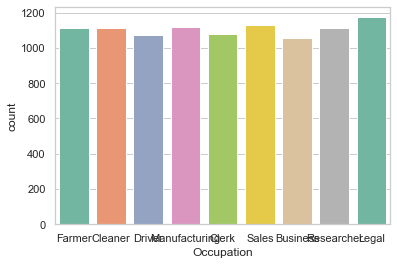

In [14]:
#Therefore we can replace the missing values by mode of Occupation column
print(df['Occupation'].value_counts())
sns.countplot(x='Occupation', data=df, palette='Set2')
plt.show()
train_data = df.copy()
# df['Occupation'].value_counts().idxmax()
train_data['Occupation'].fillna(df['Occupation'].value_counts().idxmax(),inplace=True)

In [15]:
# 2)Comorbidity
pd.crosstab(index=df["comorbidity"],columns="count")

col_0,count
comorbidity,
Coronary Heart Disease,2595
Diabetes,2614
Hypertension,2642
None,2637


In [16]:
print('Percent of missing "Comorbidity" records is %.2f%%' %((df['comorbidity'].isnull().sum()/df.shape[0])*100))

Percent of missing "Comorbidity" records is 2.11%


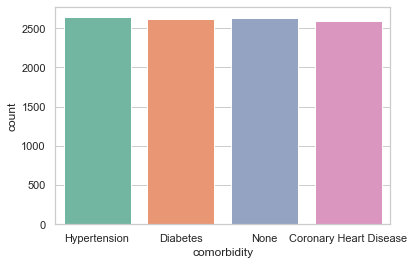

In [17]:
#Therefore we can replace the missing values by mode of Comorbidity column
sns.countplot(x='comorbidity', data=df, palette='Set2')
plt.show()
train_data['comorbidity'].fillna(df['comorbidity'].value_counts().idxmax(),inplace=True)

Percent of missing "cardiological pressure" records is 0.91%
Normal      2681
Stage-01    2657
Elevated    2641
Stage-02    2638
Name: cardiological pressure, dtype: int64


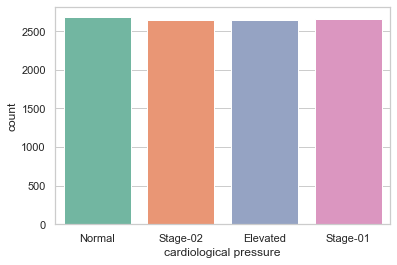

In [18]:
# 3) cardiological pressure
print('Percent of missing "cardiological pressure" records is %.2f%%' %((df['cardiological pressure'].isnull().sum()/df.shape[0])*100))
#Therefore we can replace the missing values by mode of cardiological pressure column
print(df['cardiological pressure'].value_counts())
sns.countplot(x='cardiological pressure', data=df, palette='Set2')
plt.show()
train_data['cardiological pressure'].fillna(df['cardiological pressure'].value_counts().idxmax(),inplace=True)

In [19]:
# 4) Diuresis
print('Percent of missing "Diuresis" records is %.2f%%' %((df['Diuresis'].isnull().sum()/df.shape[0])*100))


Percent of missing "Diuresis" records is 6.68%


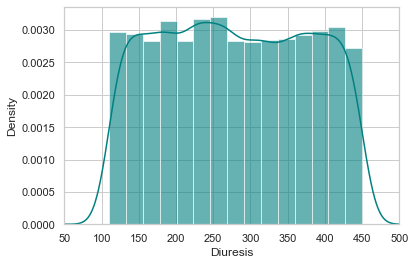

In [20]:
ax = df["Diuresis"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Diuresis"].plot(kind='density', color='teal')
ax.set(xlabel='Diuresis')
plt.xlim(50,500)
plt.show()

In [21]:
#Therefore we can replace the missing values by median of Diuresis column
train_data['Diuresis'].fillna(df['Diuresis'].median(skipna = True),inplace = True)

In [22]:
# 5) Platelets
print('Percent of missing "Platelets" records is %.2f%%' %((df['Platelets'].isnull().sum()/df.shape[0])*100))


Percent of missing "Platelets" records is 8.62%


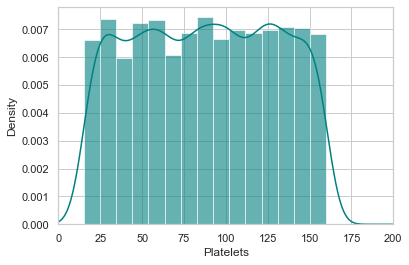

In [23]:
ax = df["Platelets"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Platelets"].plot(kind='density', color='teal')
ax.set(xlabel='Platelets')
plt.xlim(0,200)
plt.show()

In [24]:
#Therefore we can replace the missing values by median of Platelets column
train_data['Platelets'].fillna(df['Platelets'].median(skipna = True),inplace = True)

Percent of missing "HBB" records is 0.15%


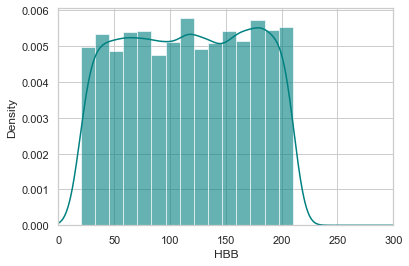

In [25]:
# 6) HBB
print('Percent of missing "HBB" records is %.2f%%' %((df['HBB'].isnull().sum()/df.shape[0])*100))
ax = df["HBB"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["HBB"].plot(kind='density', color='teal')
ax.set(xlabel='HBB')
plt.xlim(0,300)
plt.show()

#Therefore we can replace the missing values by median of Platelets column
train_data['HBB'].fillna(df['HBB'].median(skipna = True),inplace = True)

Percent of missing "d-dimer" records is 10.40%


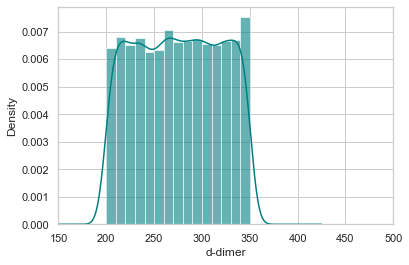

In [26]:
# 6) d-dimer
print('Percent of missing "d-dimer" records is %.2f%%' %((df['d-dimer'].isnull().sum()/df.shape[0])*100))
ax = df["d-dimer"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["d-dimer"].plot(kind='density', color='teal')
ax.set(xlabel='d-dimer')
plt.xlim(150,500)
plt.show()

#Therefore we can replace the missing values by median of Platelets column
train_data['d-dimer'].fillna(df['d-dimer'].median(skipna = True),inplace = True)

Percent of missing "Heart rate" records is 10.40%


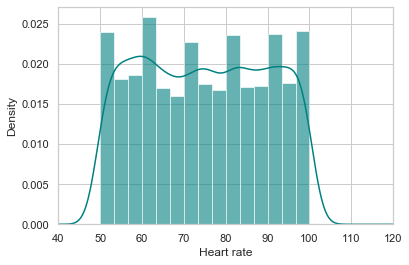

In [27]:
# 7) Heart rate
print('Percent of missing "Heart rate" records is %.2f%%' %((df['Heart rate'].isnull().sum()/df.shape[0])*100))
ax = df["Heart rate"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Heart rate"].plot(kind='density', color='teal')
ax.set(xlabel='Heart rate')
plt.xlim(40,120)
plt.show()

#Therefore we can replace the missing values by mean of Platelets column
train_data['Heart rate'].fillna(df['Heart rate'].mean(skipna = True),inplace = True)

Percent of missing "HDL cholesterol" records is 0.33%


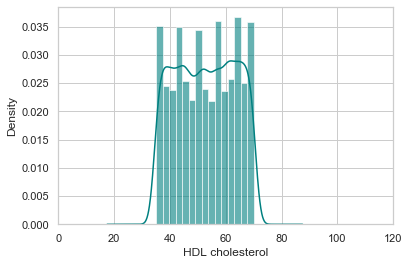

In [28]:
# 8) HDL cholesterol
print('Percent of missing "HDL cholesterol" records is %.2f%%' %((df['HDL cholesterol'].isnull().sum()/df.shape[0])*100))
ax = df["HDL cholesterol"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["HDL cholesterol"].plot(kind='density', color='teal')
ax.set(xlabel='HDL cholesterol')
plt.xlim(0,120)
plt.show()

#Therefore we can replace the missing values by mean of HDL cholesterol column
train_data['HDL cholesterol'].fillna(df['HDL cholesterol'].mean(skipna = True),inplace = True)

Percent of missing "FT/month " records is 6.75%
1.0    3351
2.0    3343
0.0    3297
Name: FT/month, dtype: int64


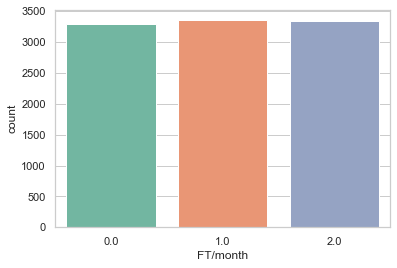

In [29]:
# 9) FT/month 
print('Percent of missing "FT/month " records is %.2f%%' %((df['FT/month'].isnull().sum()/df.shape[0])*100))
#Therefore we can replace the missing values by mode of FT/month column
print(df['FT/month'].value_counts())
sns.countplot(x='FT/month', data=df, palette='Set2')
plt.show()
train_data['FT/month'].fillna(df['FT/month'].value_counts().idxmax(),inplace=True)

Percent of missing "Mode_transport" records is 0.03%
Public    3588
Walk      3568
Car       3555
Name: Mode_transport, dtype: int64


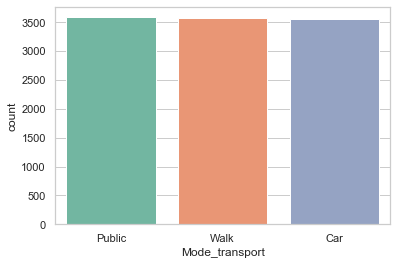

In [30]:

# 9) Mode_transport 
print('Percent of missing "Mode_transport" records is %.2f%%' %((df['Mode_transport'].isnull().sum()/df.shape[0])*100))
#Therefore we can replace the missing values by mode of Mode_transport column
print(df['Mode_transport'].value_counts())
sns.countplot(x='Mode_transport', data=df, palette='Set2')
plt.show()
train_data['Mode_transport'].fillna(df['Mode_transport'].value_counts().idxmax(),inplace=True)

In [31]:
train_data.isna().sum()

Region                    0
Gender                    0
Occupation                0
Mode_transport            0
cases/1M                  0
Deaths/1M                 0
comorbidity               0
Age                       0
Coma score                0
Pulmonary score           0
cardiological pressure    0
Diuresis                  0
Platelets                 0
HBB                       0
d-dimer                   0
Heart rate                0
HDL cholesterol           0
Charlson Index            0
Blood Glucose             0
FT/month                  0
Infect_Prob               0
dtype: int64

Filling of missing values is done

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 21 columns):
Region                    10714 non-null object
Gender                    10714 non-null object
Occupation                10714 non-null object
Mode_transport            10714 non-null object
cases/1M                  10714 non-null int64
Deaths/1M                 10714 non-null int64
comorbidity               10714 non-null object
Age                       10714 non-null int64
Coma score                10714 non-null int64
Pulmonary score           10714 non-null object
cardiological pressure    10714 non-null object
Diuresis                  10714 non-null float64
Platelets                 10714 non-null float64
HBB                       10714 non-null float64
d-dimer                   10714 non-null float64
Heart rate                10714 non-null float64
HDL cholesterol           10714 non-null float64
Charlson Index            10714 non-null int64
Blood Glucose             

In [33]:
#segregating the categorical features in the dataframe
categorical_feature_mask = train_data.dtypes==object
categorical_feature_mask
categorical_cols = train_data.columns[categorical_feature_mask].tolist()

In [34]:
categorical_cols

['Region',
 'Gender',
 'Occupation',
 'Mode_transport',
 'comorbidity',
 'Pulmonary score',
 'cardiological pressure']

In [35]:
#Using label encoder for converting object type to int type
from sklearn.preprocessing import LabelEncoder# instantiate labelencoder object
le = LabelEncoder()
train_data_2 = train_data.copy()

In [36]:
train_data[categorical_cols] = train_data[categorical_cols].apply(lambda col:le.fit_transform(col))
train_data[categorical_cols].head(10)

,Region,Gender,Occupation,Mode_transport,comorbidity,Pulmonary score,cardiological pressure
0,1,0,4,1,2,3,1
1,1,0,4,2,1,0,3
2,1,0,1,1,3,2,0
3,1,0,3,0,0,1,2
4,1,0,6,0,1,3,1
5,1,0,2,1,3,0,3
6,1,0,6,0,0,3,1
7,1,0,6,1,1,1,2
8,1,0,8,1,2,1,2
9,1,0,4,1,3,2,0


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ACTX_train=scaler.fit_transform(train_data.iloc[:,0:-1])

In [40]:
ACTy_train = train_data['Infect_Prob'].values


In [41]:
#building a model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(ACTX_train,ACTy_train)
lin_reg = LinearRegression()
lin_reg.fit(ACTX_train,ACTy_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
lin_reg.predict(ACTX_train)
ACTX_train.shape

(10714, 20)

In [43]:
test_data = pd.read_excel('Test_dataset.xlsx')

In [44]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14498 entries, 0 to 14497
Data columns (total 27 columns):
people_ID                 14498 non-null int64
Region                    14498 non-null object
Gender                    14498 non-null object
Designation               14498 non-null object
Name                      14466 non-null object
Married                   14498 non-null object
Children                  14498 non-null int64
Occupation                14498 non-null object
Mode_transport            14498 non-null object
cases/1M                  14498 non-null int64
Deaths/1M                 14498 non-null int64
comorbidity               14498 non-null object
Age                       14498 non-null int64
Coma score                14498 non-null int64
Pulmonary score           14498 non-null object
cardiological pressure    14498 non-null object
Diuresis                  14498 non-null int64
Platelets                 14498 non-null int64
HBB                       14498 non

In [45]:
test_people_id = test_data['people_ID']
test_data= test_data.drop(['people_ID','Designation','Children','Name','Married','Insurance','salary'],axis = 1)

In [46]:
categorical_feature_mask = test_data.dtypes==object
categorical_feature_mask
categorical_cols = test_data.columns[categorical_feature_mask].tolist()
categorical_cols

['Region',
 'Gender',
 'Occupation',
 'Mode_transport',
 'comorbidity',
 'Pulmonary score',
 'cardiological pressure']

In [47]:
le = LabelEncoder()
test_data_2 = test_data.copy()

In [48]:
test_data[categorical_cols] = test_data[categorical_cols].apply(lambda col:le.fit_transform(col))
test_data[categorical_cols].head(10)

,Region,Gender,Occupation,Mode_transport,comorbidity,Pulmonary score,cardiological pressure
0,0,0,3,1,1,1,2
1,0,1,5,2,1,1,2
2,0,0,8,0,1,0,3
3,0,0,8,0,3,2,0
4,0,0,0,0,1,1,2
5,0,1,8,2,1,2,0
6,0,0,3,0,3,3,1
7,0,0,6,2,3,2,0
8,0,0,7,1,2,3,1
9,0,0,7,1,2,1,2


In [49]:
ACTX_test=scaler.fit_transform(test_data)
ACTX_test.shape
test_data.columns

Index(['Region', 'Gender', 'Occupation', 'Mode_transport', 'cases/1M',
       'Deaths/1M', 'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Diuresis', 'Platelets', 'HBB', 'd-dimer',
       'Heart rate', 'HDL cholesterol', 'Charlson Index', 'Blood Glucose',
       'FT/month'],
      dtype='object')

In [52]:
train_data.describe()

,Region,Gender,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,...,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Infect_Prob
count,10714.000000,10714.000000,10714.000000,10714.000000,10714.000000,10714.000000,10714.000000,10714.000000,10714.000000,10714.000000,...,10714.000000,10714.000000,10714.000000,10714.000000,10714.000000,10714.000000,10714.000000,10714.000000,10714.000000,10714.000000
mean,1.609670,0.493840,4.117323,1.001213,3.285888,0.523241,1.517734,42.083722,9.013067,1.505040,...,278.618723,87.813422,116.172205,275.365876,74.847396,52.632737,20.028094,5.015027,1.004293,52.280680
std,1.207403,0.499985,2.493631,0.815409,2.721274,0.854303,1.107459,15.323397,3.714970,1.118826,...,94.657085,40.005617,55.137600,41.337432,14.074801,10.417234,11.828445,1.399770,0.787267,10.674667
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,16.000000,3.000000,0.000000,...,110.000000,15.000000,20.000000,200.000000,50.000000,35.000000,0.000000,3.000000,0.000000,29.289600
25%,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000,29.000000,6.000000,1.000000,...,200.000000,55.000000,68.000000,242.000000,63.000000,44.000000,10.000000,4.000000,0.000000,47.277426
50%,2.000000,0.000000,4.000000,1.000000,2.000000,0.000000,2.000000,42.000000,9.000000,2.000000,...,276.000000,88.000000,117.000000,276.000000,74.847396,53.000000,20.000000,5.000000,1.000000,49.008389
75%,3.000000,1.000000,6.000000,2.000000,4.000000,1.000000,2.000000,55.000000,12.000000,3.000000,...,358.000000,121.000000,165.000000,309.000000,86.000000,62.000000,30.000000,6.000000,2.000000,52.762313
max,4.000000,1.000000,8.000000,2.000000,8.000000,2.000000,3.000000,68.000000,15.000000,3.000000,...,450.000000,160.000000,210.000000,350.000000,100.000000,70.000000,40.000000,7.000000,2.000000,97.632000


In [53]:
test_data.describe()

,Region,Gender,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month
count,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000
mean,2.577597,0.509863,4.020210,0.996827,5.886743,1.342737,1.486550,42.083667,8.985860,1.508829,1.495172,280.657608,86.886467,114.082977,274.667264,75.021727,52.417920,19.997448,4.995724,1.002966
std,1.680428,0.499920,2.593536,0.818572,4.651725,0.953566,1.114717,15.326426,3.754762,1.115320,1.111751,98.240677,42.194450,55.207974,43.706160,14.549680,10.341219,11.887840,1.416303,0.818952
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,3.000000,0.000000,0.000000,110.000000,15.000000,20.000000,200.000000,50.000000,35.000000,0.000000,3.000000,0.000000
25%,1.000000,0.000000,2.000000,0.000000,3.000000,1.000000,0.000000,29.000000,6.000000,1.000000,1.000000,195.000000,51.000000,66.000000,237.000000,63.000000,43.000000,10.000000,4.000000,0.000000
50%,3.000000,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,42.000000,9.000000,2.000000,1.000000,280.000000,87.000000,113.000000,274.000000,75.000000,52.000000,20.000000,5.000000,1.000000
75%,4.000000,1.000000,6.000000,2.000000,11.000000,2.000000,2.000000,55.000000,12.000000,3.000000,2.000000,366.000000,124.000000,162.000000,312.000000,88.000000,61.000000,30.000000,6.000000,2.000000
max,5.000000,1.000000,8.000000,2.000000,13.000000,3.000000,3.000000,68.000000,15.000000,3.000000,3.000000,450.000000,160.000000,210.000000,350.000000,100.000000,70.000000,40.000000,7.000000,2.000000


In [54]:
train_data.head()

,Region,Gender,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,...,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Infect_Prob
0,1,0,4,1,2,0,2,68,8,3,...,441.0,154.0,93.0,233.0,82.0,58.0,27,7,2.0,49.135010
1,1,0,4,2,2,0,1,64,15,0,...,276.0,121.0,56.0,328.0,89.0,68.0,5,6,1.0,51.147880
2,1,0,1,1,2,0,3,19,13,2,...,416.0,124.0,137.0,213.0,77.0,43.0,40,6,1.0,73.224000
3,1,0,3,0,2,0,0,33,9,1,...,410.0,98.0,167.0,275.0,64.0,60.0,27,7,1.0,48.779225
4,1,0,6,0,2,0,1,23,7,3,...,390.0,21.0,153.0,331.0,71.0,64.0,32,7,1.0,87.868800


Now I am going to split the Train_dataset in to train and test data so that I can measure the accuracy that I am getting. Then I am going to use the same model on the actual training and test data.
Here I am using polynomial regression and also random forest algorithms. 
Of those two regression algorithms I found that random forest algorithm is giving me good results( around 91% accuracy).
So I am going to use the random forest model on the actual data and find the probability of infected persons on Test_dataset that was provided.

In [55]:
#splitting the data into training and testing
sc = StandardScaler()
X = sc.fit_transform(train_data.iloc[:,0:-1])
y = train_data.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [56]:
X_train.shape

(8571, 20)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
poly_reg.fit(X_train,y_train)
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [58]:
y_pred=lin_reg.predict(X_test)
y_pred

array([54.41561071, 54.80577886, 54.8649677 , ..., 55.40073852,
       46.05785532, 48.63242658])

In [59]:
# Baseline errors, and display average baseline error
errors = abs(y_pred -y_test)
print('Average error: ', round(np.mean(errors), 2))


Average error:  6.37


In [60]:
#mean average percentage error
mape = 100*(errors/y_test)
accuracy = 100-np.mean(mape)
print('Accuracy on Training data:',accuracy)


Accuracy on Training data: 88.36153277954475


In [61]:
#using random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000,random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [62]:
y_pred = rf.predict(X_test)
y_pred

array([53.42098199, 52.87298828, 51.34422163, ..., 56.20771872,
       46.4285939 , 49.20628743])

In [63]:
errors = abs(y_pred -y_test)
print('Average error: ', round(np.mean(errors), 2))
mape = 100*(errors/y_test)
accuracy = 100-np.mean(mape)
print('Accuracy on Training data:',accuracy)

Average error:  4.75
Accuracy on Training data: 90.99058045863528


In [64]:
pd.concat([pd.DataFrame(y_pred,columns = ['y_pred']),pd.DataFrame(y_test,columns = ['y_test'])],axis =1).head(10)

,y_pred,y_test
0,53.420982,53.072883
1,52.872988,52.406560
2,51.344222,47.567603
3,48.414968,48.914593
4,48.839169,49.432939
5,46.457767,46.221850
6,47.647767,47.895974
7,66.237454,76.152960
8,65.919174,82.010880
9,54.102315,47.764298


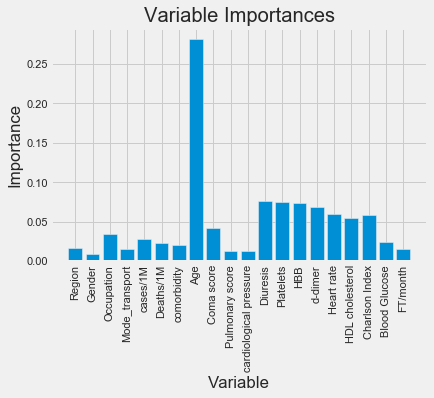

In [65]:
# Set the style
importances = list(rf.feature_importances_)
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')# Tick labels for x axis
plt.xticks(x_values, train_data.columns.tolist(), rotation='vertical')# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

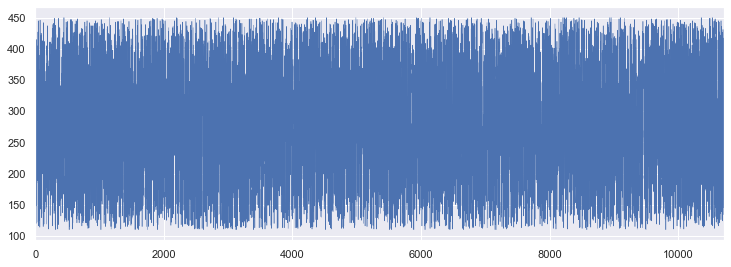

In [74]:
sns.set(rc={'figure.figsize':(11, 4)})
df['Diuresis'].plot(linewidth=0.5);
# df.Diuresis

If we observe the plot above, the diuresis column is fluctuating between 100 and 450 according to the data given in the train_dataset.xlsx file on 20th March. So based upon my analysis, this same fluctuation will be there in the days that are yet to come. 


Now we have to train random forest model on our actual training data 

In [76]:
rf = RandomForestRegressor(n_estimators=1000,random_state=42)
rf.fit(ACTX_train,ACTy_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [80]:
ACTy_pred = rf.predict(ACTX_test)
ACTy_pred.shape

(14498,)

In [84]:
pd.DataFrame(ACTy_pred,columns = ['ACTy_pred']).head(10)

,ACTy_pred
0,49.115666
1,49.379268
2,47.869336
3,48.428660
4,49.168778
5,48.113454
6,48.834034
7,48.584224
8,48.791238
9,48.553858


In [88]:
result = pd.concat([test_people_id,pd.DataFrame(ACTy_pred,columns=['Infect_Prob'])],axis = 1)
result.head()

,people_ID,Infect_Prob
0,5942,49.115666
1,18664,49.379268
2,5603,47.869336
3,5649,48.428660
4,5099,49.168778


In [90]:
result.to_csv('result.csv',index=False)